In [1]:
#import the necessary libraries for the project
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the training and testing data 
train = pd.read_csv(r'C:\Users\ASUS\Desktop\DM_project\train.csv')
#test = pd.read_csv(r'C:\Users\ASUS\Desktop\DM_project\test.csv')

# Explore the data using statistics and visualization techniques

In [3]:
#print the shape of the training data 
train.shape

(614, 13)

In [4]:
#print the shape of the testing data 
#test.shape

In [5]:
#printing the first five rows of the training Data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#printing the first five rows of the test Data
#test.head()

In [7]:
#printing the informations about the training Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#print the informations about the testing Data
#test.info()

In [9]:
#print the number of missing values in each column in training data.
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#print the number of unique values in each column of the training data. 
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
print(train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


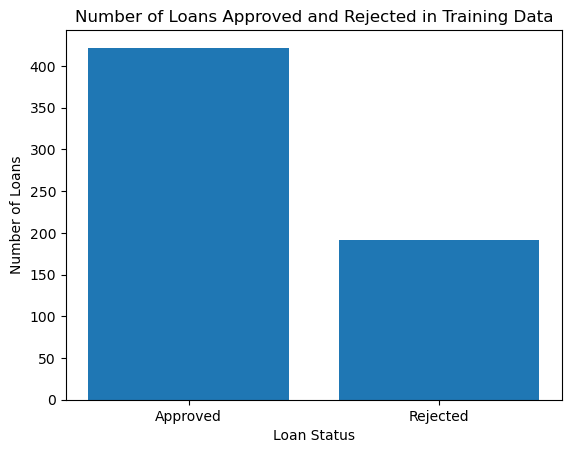

In [12]:
# Creat a bar chart to compare the number of loans approved and rejected
plt.bar(['Approved', 'Rejected'], train['Loan_Status'].value_counts())
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Approved and Rejected in Training Data')
plt.show()

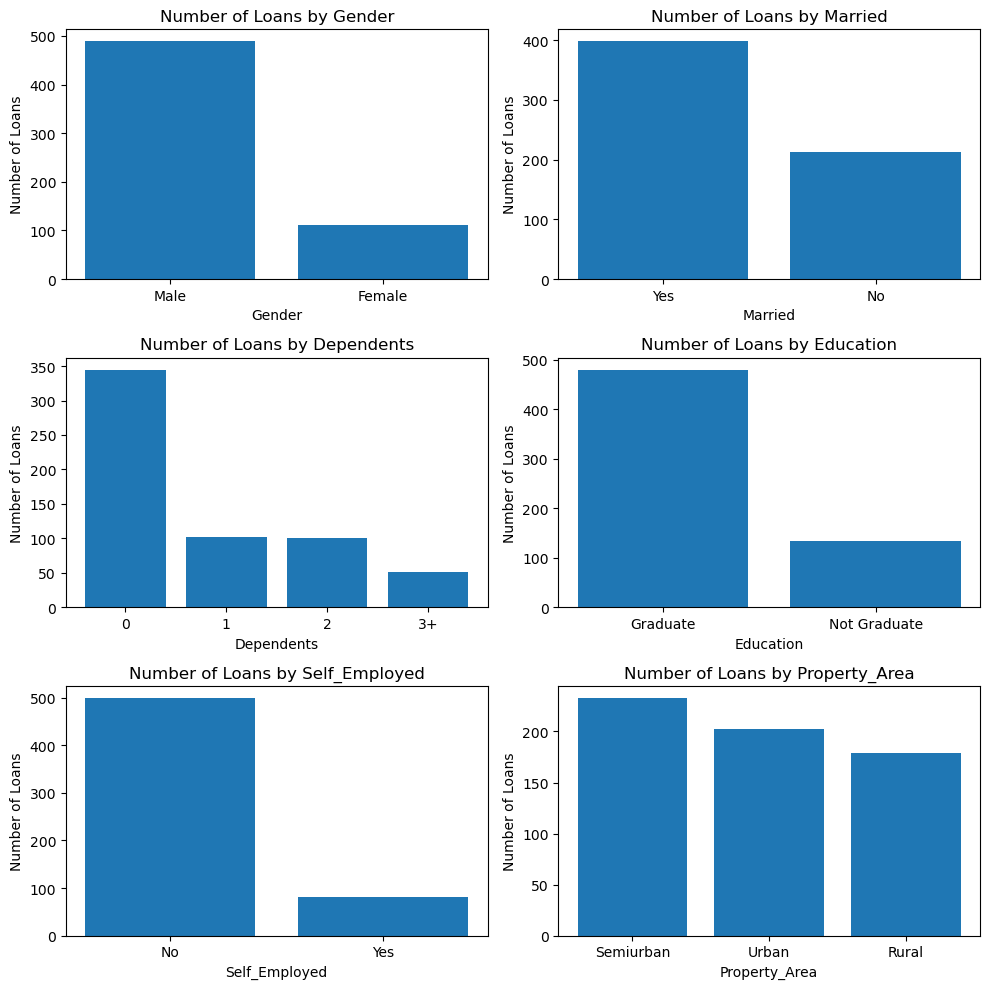

In [13]:
# Creat a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in range(3):
    for j in range(2):
        variable_index = i * 2 + j
        if variable_index < len(variables):
            variable = variables[variable_index]
            axs[i, j].bar(train[variable].value_counts().index, train[variable].value_counts().values)
            axs[i, j].set_xlabel(variable)
            axs[i, j].set_ylabel('Number of Loans')
            axs[i, j].set_title('Number of Loans by ' + variable)

fig.tight_layout()

plt.show()

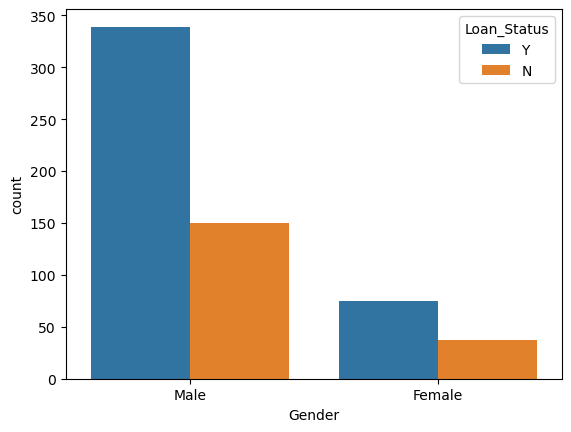

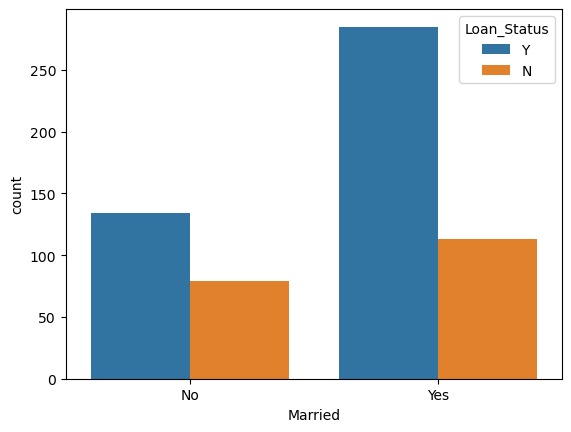

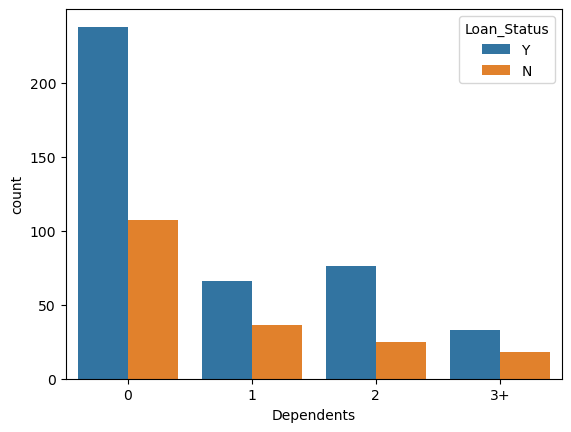

In [14]:
#print how each feature is varying on target class
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Married', hue='Loan_Status', data=train)
plt.show()


sns.countplot(x='Dependents', hue='Loan_Status', data=train)
plt.show()


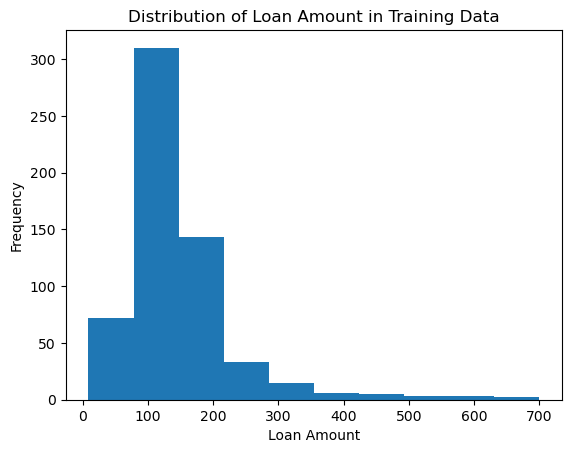

In [15]:
# Create a histogram of the LoanAmount variable
plt.hist(train['LoanAmount'])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount in Training Data')
plt.show()

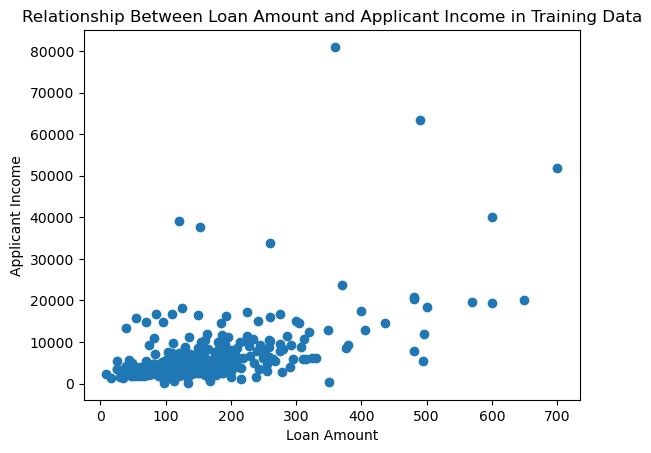

In [16]:
# Create a scatter plot to show the relationship between the LoanAmount and ApplicantIncome variables
plt.scatter(train['LoanAmount'], train['ApplicantIncome'])
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Relationship Between Loan Amount and Applicant Income in Training Data')
plt.show()

# convert Loan_Status attribute into numerical 

In [17]:
#converting Loan_Status column to a numeric variable.(1 = approved and 0 = not approved)
train['Loan_Status'][train['Loan_Status'] == 'Y'] = 1
train['Loan_Status'][train['Loan_Status'] == 'N'] = 0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\3511082153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Status'][train['Loan_Status'] == 'Y'] = 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\3511082153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Status'][train['Loan_Status'] == 'N'] = 0


# Dropping the duplicates if any

In [18]:
# Count the number of duplicate rows in the training dataset
num_duplicates = train[train.duplicated()].shape[0]

# Print the number of duplicates
print("Number of Duplicate Rows in Training Dataset:", num_duplicates)


Number of Duplicate Rows in Training Dataset: 0


In [19]:
# Count the number of duplicate rows in the training dataset
#num_duplicates = test[test.duplicated()].shape[0]

# Print the number of duplicates
#print("Number of Duplicate Rows in Testing Dataset:", num_duplicates)


# Handling outliers(IQR)

<Axes: >

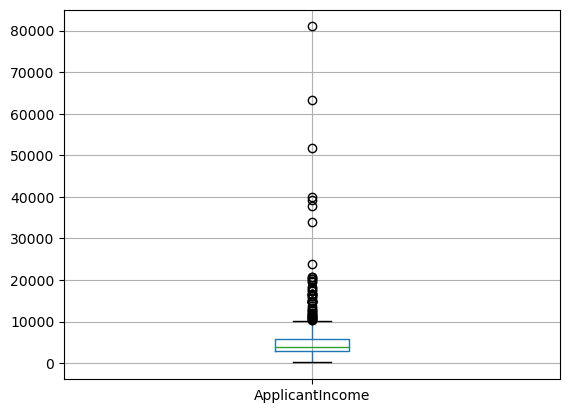

In [20]:
train.boxplot(column=['ApplicantIncome'])    


<Axes: >

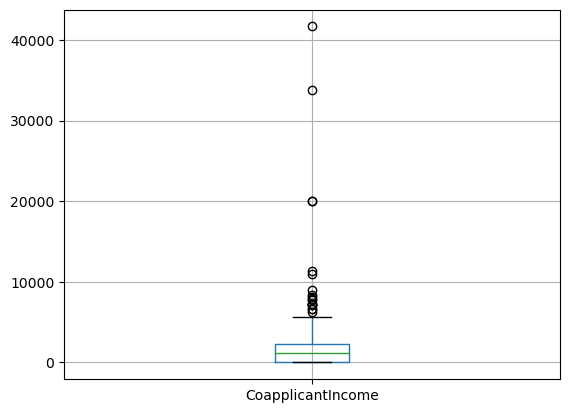

In [21]:
train.boxplot(column=['CoapplicantIncome'])         


<Axes: >

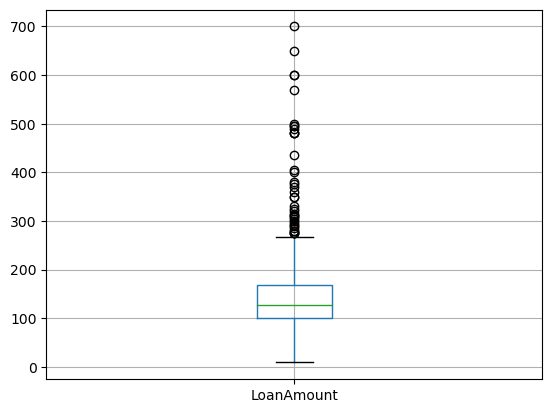

In [22]:
train.boxplot(column=['LoanAmount']) 

In [23]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['ApplicantIncome'] < (Q1 - 3 * IQR)) | (train['ApplicantIncome'] > (Q3 + 3 * IQR)))]
     



In [24]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['CoapplicantIncome'] < (Q1 - 3 * IQR)) | (train['CoapplicantIncome'] > (Q3 + 3 * IQR)))]
     



In [25]:
Q1 = train['LoanAmount'].quantile(0.25)
Q3 = train['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['LoanAmount'] < (Q1 - 3 * IQR)) | (train['LoanAmount'] > (Q3 + 3 * IQR)))]

<Axes: >

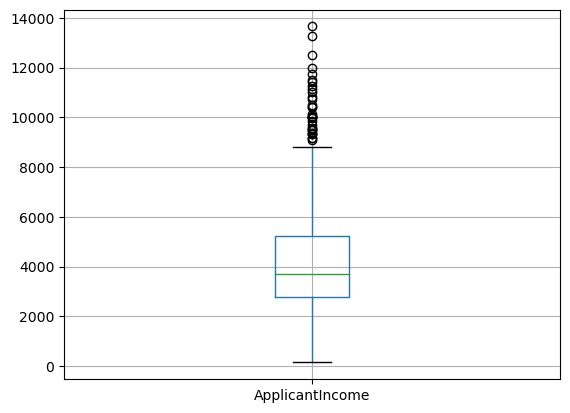

In [26]:
train.boxplot(column=['ApplicantIncome'])  

<Axes: >

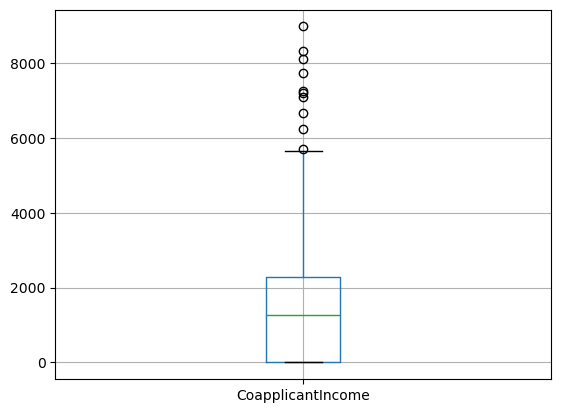

In [27]:
train.boxplot(column=['CoapplicantIncome'])

<Axes: >

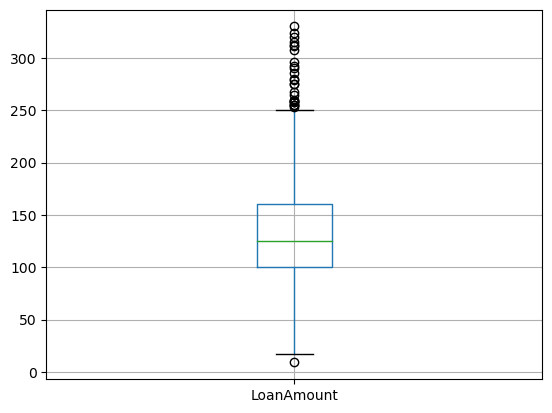

In [28]:
train.boxplot(column=['LoanAmount'])

In [29]:
#print the number of missing values
train.isna().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           15
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

# Handling missing values

In [30]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [31]:
#printing the number of unique values in each column of the training data. 
train.nunique()

Loan_ID              571
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      466
CoapplicantIncome    275
LoanAmount           181
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [32]:
#printing the number of missing values in each column in training data.
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting categorical values to numerical values

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])


In [34]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,132.854545,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Handling class imbalance

In [35]:
# check the target class for imbalance
train['Loan_Status'].value_counts()


1    394
0    177
Name: Loan_Status, dtype: int64

In [36]:
train_majority = train[train.Loan_Status == 1]
train_minority = train[train.Loan_Status == 0]


In [37]:
# use resample with replacement
from sklearn.utils import resample
train_minority_upsampled = resample(train_minority, 
                                    replace=True,     
                                    n_samples=420,    
                                    random_state=123) 


In [38]:
train = pd.concat([train_majority, train_minority_upsampled])


In [39]:
train['Loan_Status'].value_counts()


0    420
1    394
Name: Loan_Status, dtype: int64

# Feature engineering

In [40]:
# Create a new feature 'Total_Income' by adding 'ApplicantIncome' and 'CoapplicantIncome'
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

print(train[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].head())


   ApplicantIncome  CoapplicantIncome  Total_Income
0             5849                0.0        5849.0
2             3000                0.0        3000.0
3             2583             2358.0        4941.0
4             6000                0.0        6000.0
5             5417             4196.0        9613.0


In [41]:
# Remove 'Loan_Status' and 'Loan_ID' columns
X = train.drop(['Loan_Status', 'Loan_ID'], axis=1)  
Y = train['Loan_Status']


In [42]:
print(Y.value_counts())


0    420
1    394
Name: Loan_Status, dtype: int64


In [43]:

X_cat = X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',  'Total_Income'], axis=1)  # Categorical features
X_num = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income']]  # Numeric features


In [44]:
print("Shape of X_num:", X_num.shape)
print("Shape of X_cat:", X_cat.shape)
print("Shape of Y:", Y.shape)

Shape of X_num: (814, 4)
Shape of X_cat: (814, 8)
Shape of Y: (814,)


In [45]:
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income
0,5849,0.0,132.854545,5849.0
2,3000,0.0,66.000000,3000.0
3,2583,2358.0,120.000000,4941.0
4,6000,0.0,141.000000,6000.0
5,5417,4196.0,267.000000,9613.0


In [46]:
X_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,360.0,1.0,2
2,1,1,0,0,1,360.0,1.0,2
3,1,1,0,1,0,360.0,1.0,2
4,1,0,0,0,0,360.0,1.0,2
5,1,1,2,0,1,360.0,1.0,2


# Correlaton

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\1958714540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

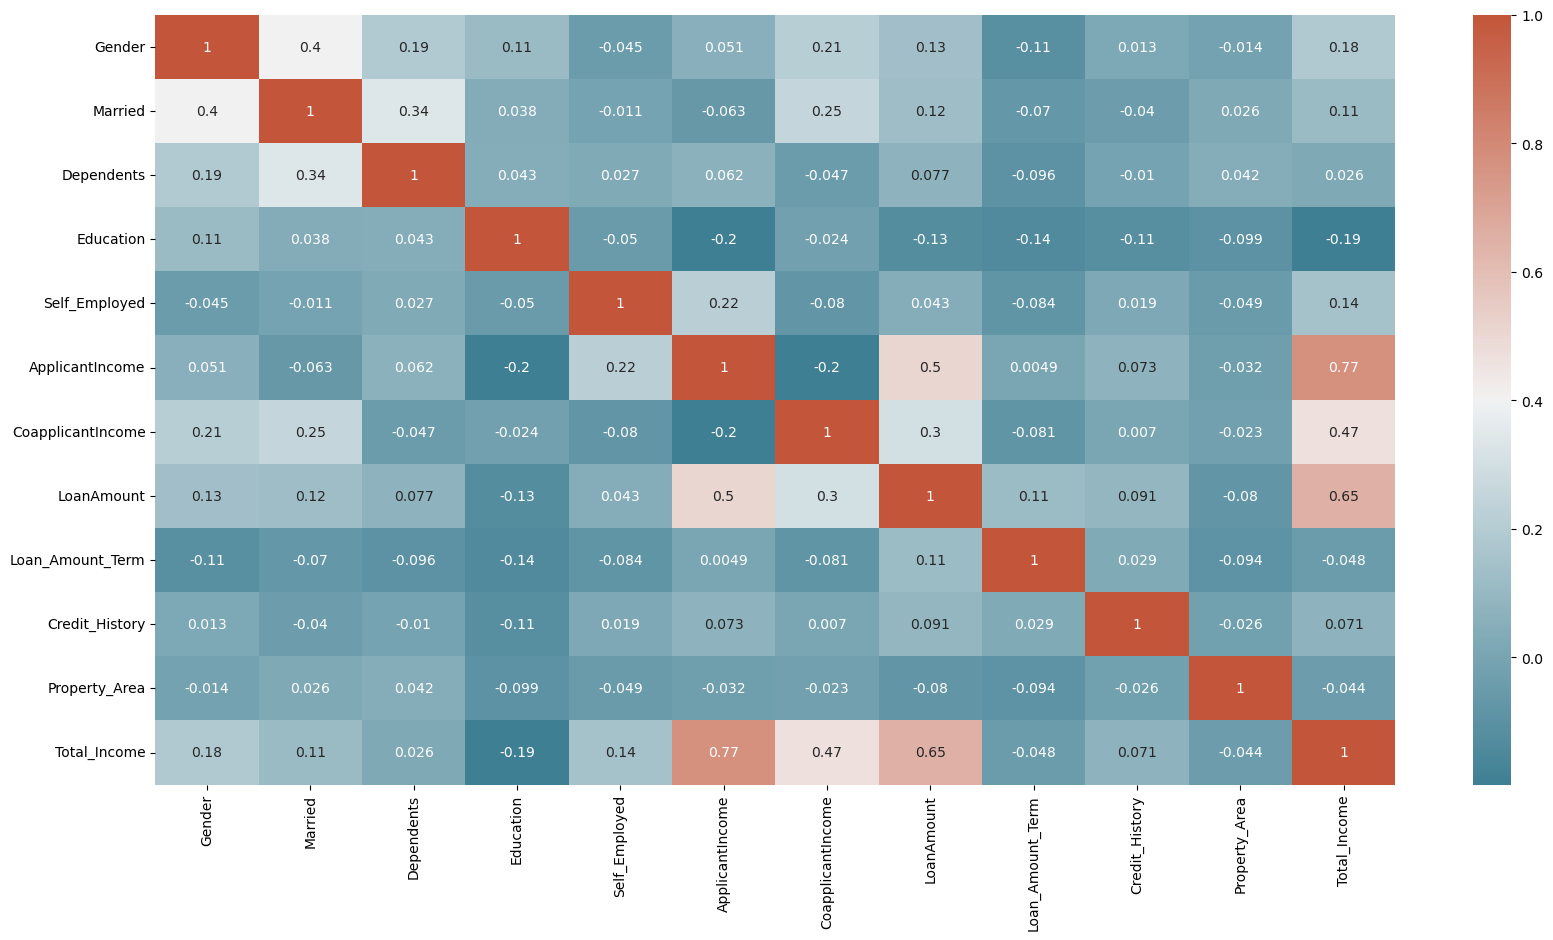

In [47]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\2326390973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

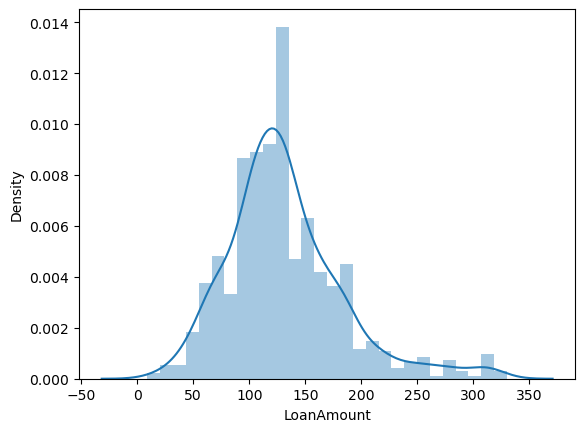

In [48]:
sns.distplot(X_num['LoanAmount'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\249691389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

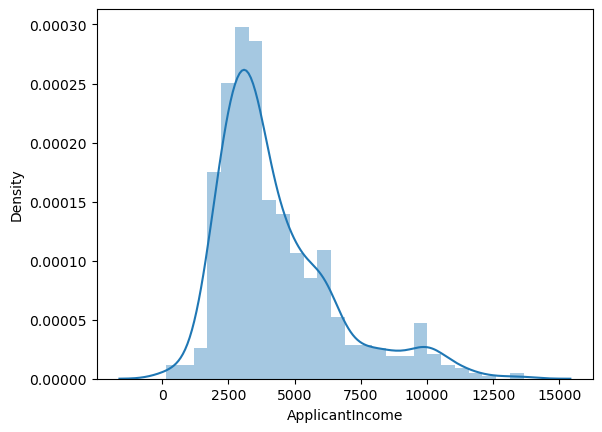

In [49]:
sns.distplot(X_num['ApplicantIncome'])

In [50]:
X_num['LoanAmount']


0      132.854545
2       66.000000
3      120.000000
4      141.000000
5      267.000000
          ...    
541     99.000000
314    159.000000
404    194.000000
226    138.000000
367    124.000000
Name: LoanAmount, Length: 814, dtype: float64

# logarithmic transformation

In [51]:
X_num = X_num[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income']].applymap(lambda x: np.log(x+1))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23564\249691389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

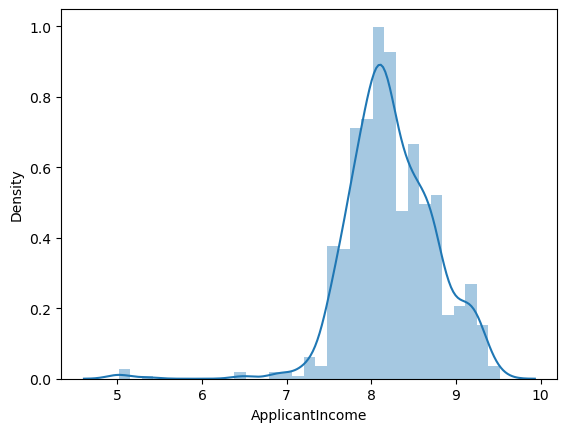

In [52]:
sns.distplot(X_num['ApplicantIncome'])

# Feature scalling 

In [53]:
#use standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

In [54]:
print(Y.dtypes)  # Check the data type of your target variable
print(Y.isnull().sum())  # Check the number of missing values in the target variable

object
0


In [66]:
Y = Y.astype(int)  # Convert target variable to integer type
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


# model selection, training, and initial evaluation

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.7607361963190185
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75        91
           1       0.67      0.92      0.77        72

    accuracy                           0.76       163
   macro avg       0.79      0.78      0.76       163
weighted avg       0.80      0.76      0.76       163

Decision Tree Accuracy: 0.8834355828220859
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        91
           1       0.92      0.81      0.86        72

    accuracy                           0.88       163
   macro avg       0.89      0.88      0.88       163
weighted avg       0.89      0.88      0.88       163

Random Forest Accuracy: 0.9325153374233128
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92    

# Cross validation

In [57]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
cv_scores_logreg = cross_val_score(logreg, X, Y, cv=12, scoring='accuracy')
print("Cross-Validation Scores for Logistic Regression:", cv_scores_logreg)
print("Mean Accuracy:", np.mean(cv_scores_logreg))

# Decision Tree
cv_scores_dt = cross_val_score(dt_classifier, X, Y, cv=12, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree:", cv_scores_dt)
print("Mean Accuracy:", np.mean(cv_scores_dt))

# Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X, Y, cv=12, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", cv_scores_rf)
print("Mean Accuracy:", np.mean(cv_scores_rf))



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Scores for Logistic Regression: [0.79411765 0.76470588 0.76470588 0.77941176 0.72058824 0.83823529
 0.75       0.77941176 0.75       0.75       0.82089552 0.70149254]
Mean Accuracy: 0.7677970441908105
Cross-Validation Scores for Decision Tree: [0.86764706 0.85294118 0.92647059 0.91176471 0.85294118 0.89705882
 0.95588235 0.83823529 0.83823529 0.89705882 0.82089552 0.85074627]
Mean Accuracy: 0.8758230904302019
Cross-Validation Scores for Random Forest: [0.92647059 0.89705882 0.91176471 0.95588235 0.95588235 0.95588235
 0.97058824 0.91176471 0.86764706 0.95588235 0.91044776 0.88059701]
Mean Accuracy: 0.9249890254609306


# Feature Selection

Feature Importance:
              Feature  Importance
9      Credit_History    0.267421
11       Total_Income    0.162867
5     ApplicantIncome    0.148107
7          LoanAmount    0.137451
6   CoapplicantIncome    0.093571
2          Dependents    0.041148
10      Property_Area    0.040204
8    Loan_Amount_Term    0.037106
3           Education    0.019879
1             Married    0.019676
4       Self_Employed    0.016875
0              Gender    0.015695


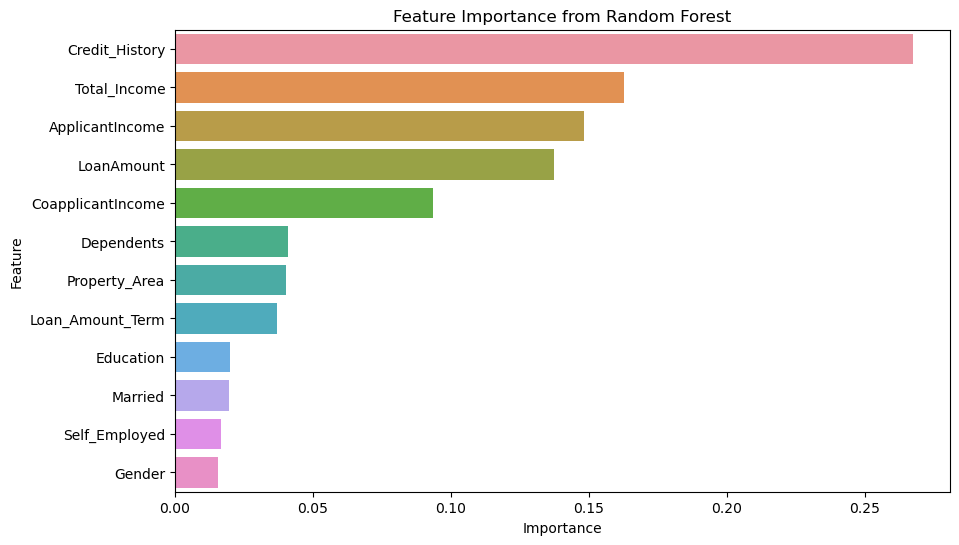

In [58]:
#take the feature importance graph
feature_importances = rf_classifier.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Feature Importance:")
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()



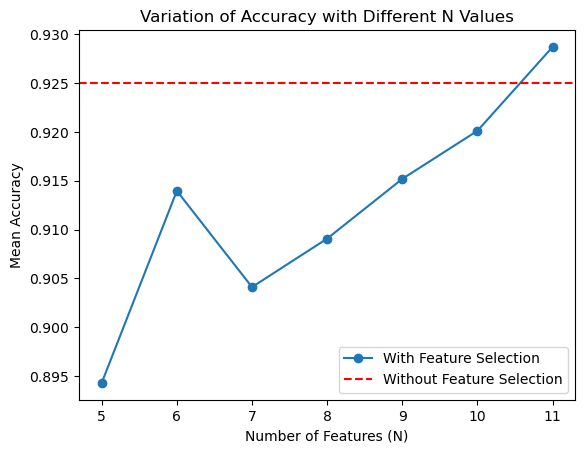

In [59]:
#check the accuracy with different number of features
import matplotlib.pyplot as plt
import numpy as np

# Define a range of N values to experiment
n_values = [5, 6, 7, 8, 9, 10, 11]  

# Initialize lists to store accuracy scores
accuracy_scores_with_selection = []

# Train the model without feature selection
final_rf_model_without_selection = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cv_scores_without_selection = cross_val_score(final_rf_model_without_selection, X, Y, cv=12, scoring='accuracy')
constant_accuracy_without_selection = np.mean(cv_scores_rf)

# Iterate over different N values for feature selection
for n in n_values:
   
    top_n_features = feature_importance_df.head(n)['Feature'].tolist()
    
    
    X_selected = X[top_n_features]
    
  
    final_rf_model_with_selection = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
    cv_scores_with_selection = cross_val_score(final_rf_model_with_selection, X_selected, Y, cv=12, scoring='accuracy')
    
   
    accuracy_scores_with_selection.append(np.mean(cv_scores_with_selection))

# Plot the variation of accuracy with different N values
plt.plot(n_values, accuracy_scores_with_selection, marker='o', label='With Feature Selection')
plt.axhline(y=constant_accuracy_without_selection, color='r', linestyle='--', label='Without Feature Selection')
plt.title('Variation of Accuracy with Different N Values')
plt.xlabel('Number of Features (N)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()


In [60]:
#no feature selection perform (only remove Loan ID)

# Hyperparameter Tuning

In [61]:
#Hyperparameter tuning for RF
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV 
grid_search_rf.fit(X, Y)

# Print the best parameters 
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9115201090661212


# Make the Final Submission 

In [62]:
# Load test dataset
test = pd.read_csv(r'C:\Users\ASUS\Desktop\DM_project\test.csv')


# Handle missing values in the test dataset
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

# Combine 'ApplicantIncome' and 'CoapplicantIncome' into 'Total_Income' in the test dataset
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Apply log transformation to 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount' in the test dataset
test['ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
test['CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])
test['LoanAmount'] = np.log1p(test['LoanAmount'])


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Married'] = label_encoder.fit_transform(test['Married'])
test['Education'] = label_encoder.fit_transform(test['Education'])
test['Self_Employed'] = label_encoder.fit_transform(test['Self_Employed'])
test['Property_Area'] = label_encoder.fit_transform(test['Property_Area'])
test['Dependents'] = label_encoder.fit_transform(test['Dependents'])

test_test = test.drop(['Loan_ID'], axis=1)
print("\nPreprocessed Test Dataset:")
print(test.head())

print("\nPreprocessed train Dataset:")
print(X_test.head())

predictions = grid_search_rf.predict(test_test)


submission_df = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': predictions
})

# Map numerical predictions back to original labels if necessary
# ( 1 ->Y, 0 -> N)
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the  CSV file
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file (submission.csv) created successfully.")



Preprocessed Test Dataset:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   
3  LP001035       1        1           2          0              0   
4  LP001051       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         8.651899           0.000000    4.709530             360.0   
1         8.031710           7.313887    4.844187             360.0   
2         8.517393           7.496097    5.342334             360.0   
3         7.758333           7.842671    4.615121             360.0   
4         8.094684           0.000000    4.369448             360.0   

   Credit_History  Property_Area  Total_Income  
0             1.0              2          5720  
1             1.0         

In [64]:
#Try with Logistic Regression, Decision Tree, Random Forest and XGBoost 
#got an accuracy of 0.7847 on submission
#Rank = 2099 out of  80430 registered competitors.(25.11.2023)

